In [1]:
# improt dependencies
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
df_main = pd.read_csv('./data/data.csv')

In [3]:
# let's peek into the dataset
df_main.head()

,Tm,Pr,Th,Sv,Idx
0,-20,500,0.027368,350.861031,54.903239
1,-20,500,0.027023,343.897695,52.155342
2,-20,500,0.026678,336.475830,49.533201
3,-20,500,0.026333,330.290415,47.025757
4,-20,500,0.025988,324.433876,44.623440


In [4]:
# describe the dataset
df_main.describe()

,Tm,Pr,Th,Sv,Idx
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,30.000000,1750.000000,0.031347,370.428753,36.955041
std,34.163693,854.092316,0.004823,47.564937,6.562916
min,-20.000000,500.000000,0.022739,280.730251,26.836172
25%,0.000000,1000.000000,0.027244,330.670679,31.723869
50%,30.000000,1750.000000,0.031238,365.567203,35.622198
75%,60.000000,2500.000000,0.035286,405.090140,41.405485
max,80.000000,3000.000000,0.042237,528.087720,54.903239


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 5 columns):
Tm     2376 non-null int64
 Pr    2376 non-null int64
Th     2376 non-null float64
Sv     2376 non-null float64
Idx    2376 non-null float64
dtypes: float64(3), int64(2)
memory usage: 92.9 KB


Index(['Tm', ' Pr', 'Th', 'Sv', 'Idx'], dtype='object')


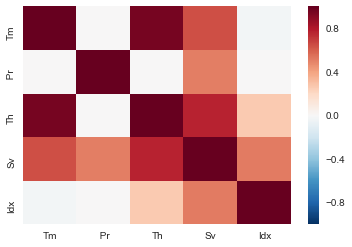

In [6]:
# calculate the correlation matrix
corr = df_main.corr()
corr_columns = corr.columns

# plot the correlation heatmap
sns.heatmap(corr)
print(corr_columns)

The above heatmap shows the correlation between all the features. Correlation of 'Sv' with 'Idx' is comparitively higher. And below the scatter plot shows that there is a linear relationship between those two variables. The same you will find in 'Th' and 'Idx'.

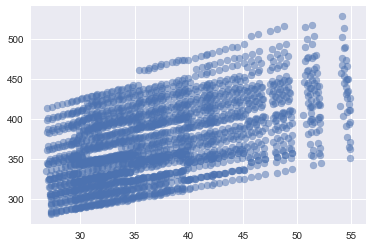

In [7]:
plt.scatter(df_main['Idx'], df_main['Sv'], alpha=0.5)

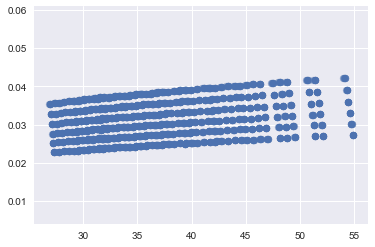

In [8]:
plt.scatter(df_main['Idx'], df_main['Th'], alpha=0.5)

In [9]:
columns_x = ['Th', 'Sv', 'Tm', ' Pr']
column_label = ['Idx']

In [10]:
X = df_main[columns_x]
y = df_main[column_label]

Now, let's split the data into train and test.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(1591, 4)
(785, 4)


### The first linear model we'll try is LinearRegression model

In [13]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)

Our model is trained, now we'll calculate R2 score. Which is a statistical measure of how close the data is to the fitted regression line. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [14]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred) 

0.9751103304647469

In [15]:
# other way of calculating the R2 score
reg.score(X_test, y_test)

0.975110330464747

Below is the list of weights and bias of the trained linear regression model.

In [16]:
print("weights: ",reg.coef_)
print("bias: ",reg.intercept_)

weights:  [[ 3.61334358e+03  5.55861130e-02 -5.43785108e-01 -1.60560837e-03]]
bias:  [-77.78381734]


Now I'll demonstrate how to use k-fold cross validation

In [17]:
# split array in k(number of folds) sub arrays
X_folds = np.array_split(X_train, 3)
y_folds = np.array_split(y_train, 3)
scores = list()
models = list()
for k in range(3):
    reg = LinearRegression()
    
    # We use 'list' to copy, in order to 'pop' later on
    X_train_fold = list(X_folds)
    # pop out kth sub array for testing
    X_test_fold  = X_train_fold.pop(k)
    # concatenate remaining sub arrays for training
    X_train_fold = np.concatenate(X_train_fold)
    
    # same process for y
    y_train_fold = list(y_folds)
    y_test_fold  = y_train_fold.pop(k)
    y_train_fold = np.concatenate(y_train_fold)
    
    reg = reg.fit(X_train_fold, y_train_fold)
    scores.append(reg.score(X_test_fold, y_test_fold))
    models.append(reg)

print(scores)

[0.9783321790402408, 0.9732533362920271, 0.975740344322028]


I have taken only one linear model as an example here, but you can try different models. And compare them.

### Polynomial model

In sklearn, there is a module named make_pipeline. So, in order to use the polynomial or non-linear model, what we have to do is, we make a pipeline with a linear model(LinearRegression, in our case) to PolynomialFeatures (which is also a class that takes 'degree' of polinomial in its constructor).

In [33]:
# polynomial model
for count, degree in enumerate([2, 3, 4, 5, 6]):
    print("Degree ",degree)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score: ",r2_score(y_test, y_pred))
#     print("coefficiets: ",model.steps[1][1].coef_)
    equation = "("
    weight_index = 0
    for row in model.steps[0][1].powers_:
        equation += ""+str(model.steps[1][1].coef_[0][weight_index])+"*"
        variable_index = 1
        for variable in row:
            if variable > 0:
                equation += "X"+str(variable_index)+"^"+str(variable)+"*"
            variable_index += 1
        equation = equation[:-1]
        equation += ")+("
        weight_index += 1
    print("equation: ",equation[:-2])
    print("bias: ",model.steps[1][1].intercept_)
    print("---------------------------------")
    print()

Degree  2
R2 score:  0.9977539196788104
equation:  (0.0)+(-4859.601687699423*X1^1)+(-0.07276267429669948*X2^1)+(1.252604439499959*X3^1)+(0.002978540465966237*X4^1)+(180569.50450222704*X1^2)+(0.4341954847648627*X1^1*X2^1)+(-67.6552123152586*X1^1*X3^1)+(-0.05016684049681255*X1^1*X4^1)+(0.00011724670912371948*X2^2)+(-0.0002992442168761045*X2^1*X3^1)+(-6.064079286716151e-06*X2^1*X4^1)+(0.00557667764951475*X3^2)+(1.2334676284808666e-05*X3^1*X4^1)+(6.281788955675438e-08*X4^2)
bias:  [42.67087778]
---------------------------------

Degree  3
R2 score:  0.9981974520370632
equation:  (-0.015071918058648534)+(-7208.776376546431*X1^1)+(-0.5730917705434111*X2^1)+(0.46273799918667097*X3^1)+(0.020993970566208605*X4^1)+(-144.5284484946879*X1^2)+(23.861855825325176*X1^1*X2^1)+(82.78025092288725*X1^1*X3^1)+(-0.8499467095421332*X1^1*X4^1)+(0.0009400339288441473*X2^2)+(-0.005445666046803596*X2^1*X3^1)+(-6.561013149930517e-05*X2^1*X4^1)+(-0.010595277752048472*X3^2)+(0.0001464586363750242*X3^1*X4^1)+(1.497

Above results show that, degree 5 gives the best score. On 6, the scores goes down, which means that our model is starting to overfit the data.
You can also try using k-fold CV with every degree and see which model performs the best.